# Proton Training and Validation Modularized

## Dependencies

In [1]:
# !pip3 install swifter
# !pip3 install xgboost
# !pip3 install tqdm
# !pip3 install category_encoders
# !pip3 install joblib
# !pip3 install scikit-plot
# !pip3 install catboost
# !pip3 install RegscorePy
# !pip3 install -U spacy
# !pip3 install gensim
# !pip3 install xlrd

## Main Function

Enter the path here : titanic.csv
#### RUNNING WAIT ####
extension is csv
We have a csv file
This file has 12 columns and 30 rows

DataFrame Succesfully imported

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Enter 'quit' to quit
What would you like to predict? : Survived
Target Spotted!

Enter 'quit' to quit
Enter the Key/Identification Column : 
Key  Not found in the data
Preview can't be shown!!
Is the column 'PassengerId' an identification column? If yes, enter y : y
Identification column obtained
Do you think you have Successive Targets based on the current target? If yes, enter the column names below 
in this format separated by commas: col1,col2,col3

No Columns removed
Would you like to remove any other ID,zip Code,Phone Numbers,UNIQUE lists, 
Or columns that have only one unique entry? If yes, enter the column names below 
in this format separated by commas: col1,col2,co



The final score sheet of 6 selected columns with importances:

  col_name   scores2   t/f
6      Sex  0.663409  True
5   Pclass  0.167400  True
4     Fare  0.037122  True
0      Age  0.030538  True
2    Parch  0.030350  True
3   Ticket  0.029798  True

2 columns are eliminated during Feature Selection which are:
{'SibSp', 'Embarked'}
Feature Selection Time taken : 0.6559977531433105


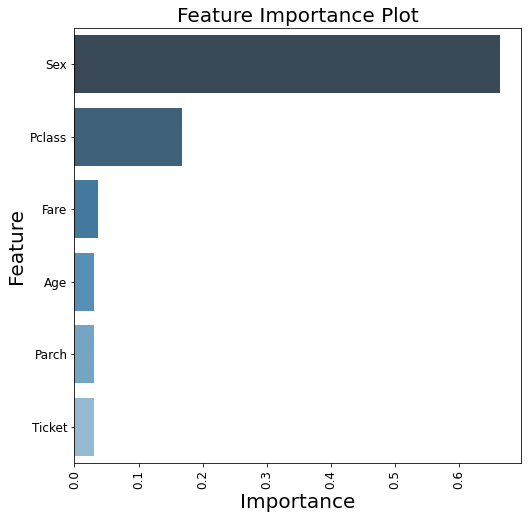

Feature Selection Plot Time taken : 0.306002140045166

 #### Printing Sample Equation of the DATA ####
LABEL ENCODED FOR SAMPLE EQUATION

Power term = 0.004916270068722787*Age + 0.00023888709896608296*Parch + -3.1684834958206764e-06*Ticket + 0.01895068341003901*Fare + -0.0002586280666964249*Pclass + -0.0003601392424619437*Sex + 0.0002102853273184933

Probability(Y=1) = exp(Power term)/(exp(Power term) + 1)


WHERE, the encoded information is as follows : 

  Pclass  Pclass encoded info     Sex  Sex encoded info
0      1                    0  female               0.0
1      2                    1    male               1.0
2      3                    2     NaN               NaN


 #### DONE ####

 #### NORMALIZATION ####
 #### DONE ####

 #### POWER TRANSFORMATIONS ####
 #### DONE ####

 #### SAVING MODEL INFORMATION ####
 #### DONE ####

 TOTAL TRAINING DATA CLEANING AND PLOTS : 2.7528326511383057

	 #### VALIDATION AND SCORING ZONE ####




 #### TRANSFORMATION AND PREDICTION ####
num_df - (179, 5)
disc_df - (179, 3)
DATE_DF - (0, 0)
TEXT_DF - (0, 0)

 #### PRINTING THE LIST OF COLUMNS AND ITS TYPES THAT ENTER THE MODEL TRAINING ####
#### PRINTING X_test ####
Index(['Age', 'Parch', 'Ticket', 'Fare', 'Pclass', 'Sex'], dtype='object')
Age       float64
Parch     float64
Ticket    float64
Fare      float64
Pclass    float64
Sex       float64
dtype: object


         Age     Parch    Ticket      Fare    Pclass  Sex
0   1.000000  0.000000  0.605842  0.255895  0.722909  0.0
1   1.000000  0.942434  0.245878  0.943468  1.000000  0.0
2   0.526626  0.000000  0.613604  0.000000  0.722909  0.0
3   0.089391  0.000000  0.498178  0.986993  0.722909  0.0
4   0.365443  0.000000  0.991553  0.000965  0.000000  0.0
5   1.000000  0.000000  0.595961  0.237290  0.722909  0.0
6   0.329026  0.000000  1.000000  0.344781  0.000000  0.0
7   0.000000  1.000000  0.987647  0.681259  0.000000  1.0
8   0.132131  0.000000  0.498178  0.135951  0.722909  

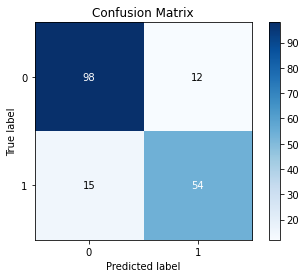

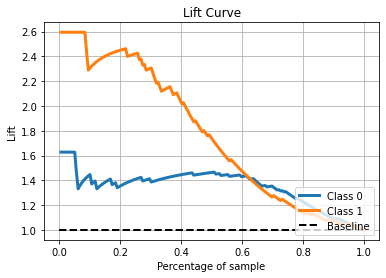

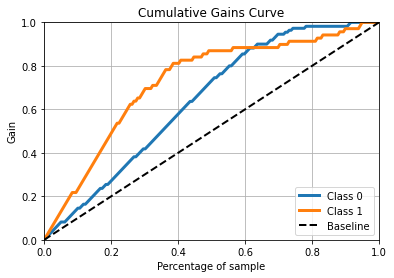

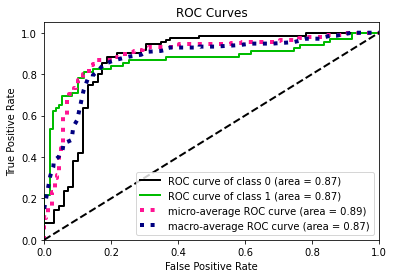

In [2]:
from userInputs import *
from INIT import *
from score import *
import time
import pandas as pd
import numpy as np
import swifter
import joblib
import warnings
warnings.filterwarnings('ignore')

def main():
    '''
    PROTON MAIN FUNCTION
    '''
    path = input('Enter the path here : ')
    error=False
    if path:
        df = importFile(path,nrows=30)
        df = dataHandler(df) # If first few rows contains unnecessary info
        info = getUserInput(df)
        if not info:
            error = True
    else:
        df = None
        print('\nQuitting Process\n')
        info = None
        error = True

    te = time.time()
    try:
        if info:
            ################## TRAINING INIT ##################
            df = importFile(path,nrows=None)
            df = dataHandler(df) # If first few rows contains unnecessary info
            tts = time.time()
            if isinstance(df,pd.DataFrame):
                init_info,validation = INIT(df,info)
            else:
                init_info,validation = None,None
            tte = time.time()
            print('\n TOTAL TRAINING DATA CLEANING AND PLOTS : {}'.format(tte-tts))
            ################## TRAINING INIT ##################

            if isinstance(validation,pd.DataFrame):
                ################## VALIDATION AND PREDICTION ##################
                score(validation,init_info,validation=True)
                ################## VALIDATION AND PREDICTION ##################
                print('\n\t #### CODE EXECUTED SUCCESSFULLY ####')
                print('\n\t #### END ####')
            else:
                print('\n\t #### CODE DID NOT RUN COMPLETELY ####')
    except KeyboardInterrupt:
        print('QUITTING!')
    ee = time.time()
    print('\n#### TOTAL TIME TAKEN : {} ####'.format(ee-te))

if __name__ == '__main__':
    # Main Function call
    main()

In [3]:
pd.read_csv('preview.csv')

,PassengerId,Actual Values,Predicted Values,Class 0 Probabilities,Class 1 Probabilities
0,233,0,0,0.934384,0.065616
1,55,0,0,0.766396,0.233604
2,278,0,0,0.915249,0.084751
3,386,0,0,0.825070,0.174930
4,76,0,0,0.914446,0.085554
...,...,...,...,...,...
95,882,0,0,0.963442,0.036558
96,510,1,0,0.526643,0.473357
97,634,0,0,0.867505,0.132495
98,236,0,1,0.327549,0.672451


In [4]:
model_info=joblib.load('model_info')['model_info'].drop(['model','param'],axis=1)
model_info.sort_values('accuracy',ascending=False,inplace=True)
model_info.drop(['accuracy'],axis=1)

Enter model path here to view MODEL COMPARISON CHART : titanicmodel


,Name,Accuracy%,Precision,Recall,F1,ROC_AUC_score,Kappa,MCC,KS_statistic,KS_p-value,Total time(mins)
8,Ensemble XGBoost+Random Forest,84.92%,0.818182,0.782609,0.800000,0.836759,0.679020,0.679452,0.016760,1.000000,0.052273
2,Random Forest,84.36%,0.797101,0.797101,0.797101,0.834914,0.669829,0.669829,0.000000,1.000000,0.038899
0,XGBoost,83.80%,0.812500,0.753623,0.781955,0.822266,0.653356,0.654526,0.027933,1.000000,0.004000
1,CatBoost,83.24%,0.774648,0.797101,0.785714,0.825823,0.648146,0.648324,0.011173,1.000000,0.063864
7,Support Vector Machine,80.45%,0.757576,0.724638,0.740741,0.789592,0.583914,0.584286,0.016760,1.000000,0.000933
3,Extra Trees Classifier,79.33%,0.722222,0.753623,0.737589,0.785903,0.567209,0.567559,0.016760,1.000000,0.013733
5,Logistic Regression,77.65%,0.693333,0.753623,0.722222,0.772266,0.535849,0.537152,0.033520,0.999968,0.000233
4,Naive Bayes,75.98%,0.691176,0.681159,0.686131,0.745125,0.491578,0.491612,0.005587,1.000000,0.000100
6,Neural Net,75.98%,0.658537,0.782609,0.715232,0.764032,0.510151,0.515839,0.072626,0.734152,0.013634


In [5]:
# import joblib

In [6]:
# joblib.load('XT').min().min()

In [7]:
# joblib.load('Xt').min().min()

In [8]:
# joblib.load('XT').max().max()

In [9]:
# joblib.load('Xt').max().max()

In [10]:
# joblib.load('YT').max()

In [11]:
# joblib.load('Yt').max()

In [12]:
# joblib.load('YT').min()

In [13]:
# joblib.load('Yt').min()